In [ ]:
import pandas as pd
import os
dfs = []
for file in os.listdir('Disease_compounds'):
    df = pd.read_excel(f'Disease_compounds/{file}')
    dfs.append(df)
dfs = pd.concat(dfs)

<Figure size 1800x1600 with 0 Axes>

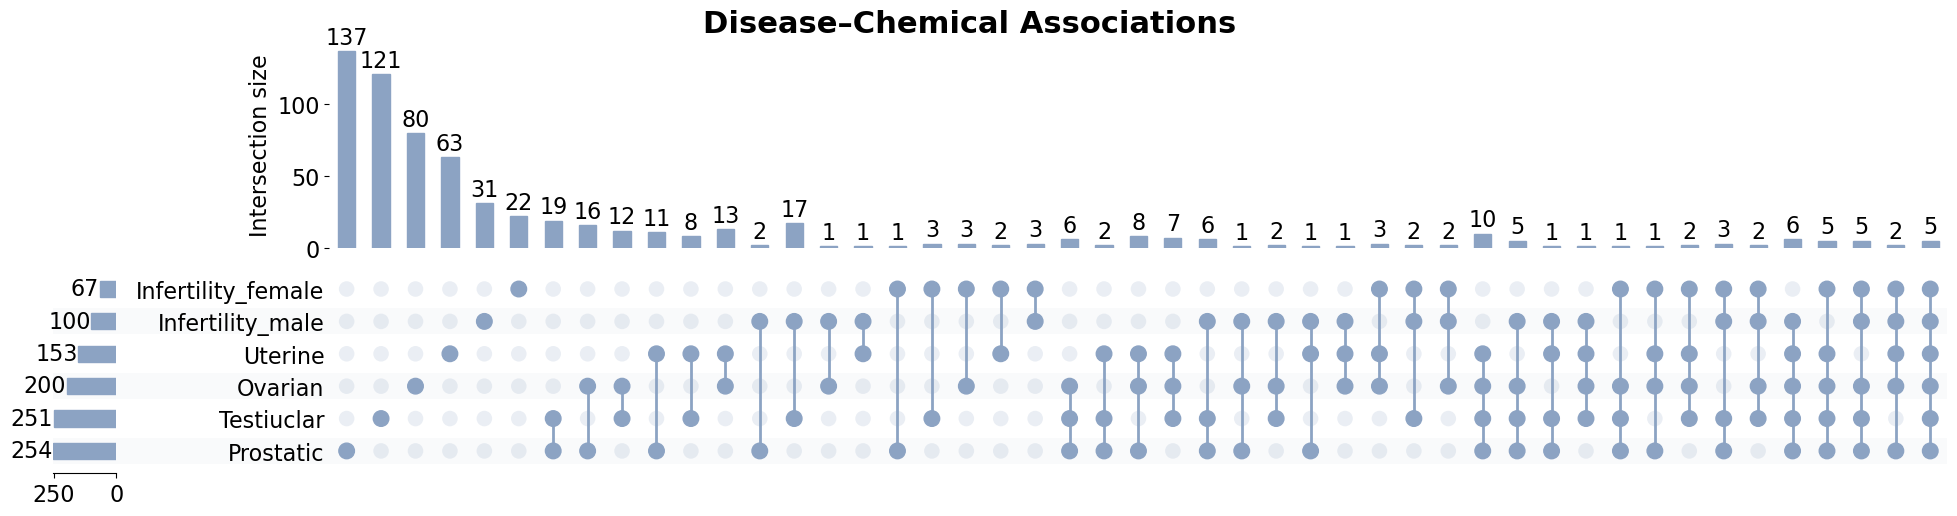

In [ ]:
from upsetplot import from_contents, UpSet
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

# Construct data
contents = (
    dfs.groupby("Disease Name")["Chemical Name"]
      .apply(set)
      .to_dict()
)
upset_data = from_contents(contents)

plt.figure(figsize=(18, 16))

UpSet(
    upset_data,
    subset_size='count',
    show_counts=True,
    sort_by='degree',   
    facecolor="#8ca3c3"
).plot()

for ax in plt.gcf().get_axes():
    ax.grid(False)

plt.suptitle("Disease–Chemical Associations", fontsize=22, weight="bold") 
plt.subplots_adjust(top=0.92) 

plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16
})

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
